# **This project analyzes a breast cancer dataset to assess a patient's chances of survival.**

# **Objective: -**
# Breast cancer is a type of cancer that begins in the breast tissue. While it primarily affects women, men can also develop breast cancer. It is the second leading cause of death among women.


# Early diagnosis of breast cancer can greatly enhance prognosis and significantly increase survival chances, as it allows for timely clinical treatment.

# ** Dataset:-**

# This dataset includes a group of breast cancer patients who underwent surgery to remove their tumors. The dataset contains the following variables:

# You have a dataset of over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:

# 1. Patient_ID: ID of the patient
2. Age: Age of the patient
3. Gender: Gender of the patient
4. Protein1, Protein2, Protein3, Protein4: expression levels
5. Tumor_Stage: Breast cancer stage of the patient
6. Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
7. ER status: Positive/Negative
8. PR status: Positive/Negative
9. HER2 status: Positive/Negative
10. Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
11. DateofSurgery: The date of Surgery
12. DateofLast_Visit: The date of the last visit of the patient
13. Patient_Status: Alive/Dead

# Step 1: Import all the required libraries

# - __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series

# - __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.

# - __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# - __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

# ** Step 2: Load and Explore the Dataset**
# Goal: In this step, we will load the dataset, review its contents, and analyze basic details such as the total number of rows and columns, the data types of each column, and assess whether any new columns need to be created.

In [146]:
#Loading libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
try:
    df = pd.read_csv('/content/BRCA.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top.
# The head() method returns the first 5 rows if a number is not specified.
df.head(-5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.244270,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 341 rows and 16 columns


In [5]:
df['Patient_Status'].value_counts()

,count
Patient_Status,
Alive,255
Dead,66


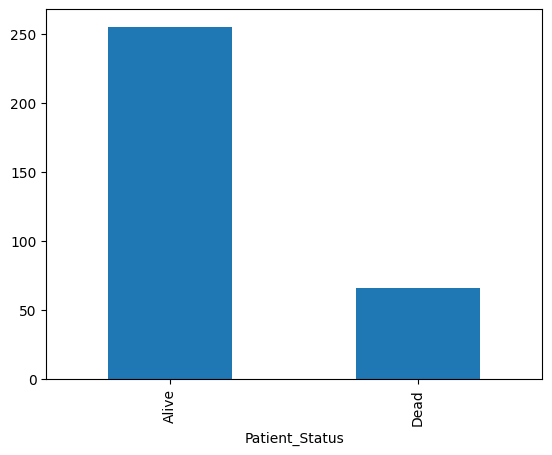

In [6]:
# Visuallizing Patient_Status
df.Patient_Status.value_counts().plot(kind="bar")
plt.show()

In [7]:
df.shape

(341, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [9]:
df.iloc[1]

,1
Patient_ID,TCGA-EW-A1OX
Age,43.0
Gender,FEMALE
Protein1,-0.42032
Protein2,0.57807
Protein3,0.61447
Protein4,-0.031505
Tumour_Stage,II
Histology,Mucinous Carcinoma
ER status,Positive


In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  11
There names are as follows:  ['Patient_ID', 'Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status']


In [12]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [13]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  0
There names are as follows:  []


In [14]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [15]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  5
There name are as follow:  ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']


In [16]:
len(df['Patient_ID'].unique()), df.shape[0]

(335, 341)

In [17]:
# dropping categorical columns with high cardinality and with only unique value
df = df.drop(['Patient_ID', 'ER status', 'PR status'], axis=1)

In [18]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 341 rows and 13 columns


In [20]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [21]:
def std_cal(df,float64_lst):

    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0

    for value in float64_lst:

        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1

    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols)

    return std_total_df

In [22]:
std_cal(df, float64_lst)

,normal_value,zero_value
0,5,0


In [23]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,0,0


In [24]:
zero_cols = []

def var_cal(df,float64_lst):

    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0

    for value in float64_lst:

        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)

    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols)

    return var_total_df

In [25]:
var_cal(df, float64_lst)

,normal_value,zero_value
0,5,0


In [26]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,0,0


In [49]:
df.mean(numeric_only=True)


,0
Age,58.886228
Protein1,-0.029991
Protein2,0.946896
Protein3,-0.090204
Protein4,0.009819


In [28]:
def mean_cal(df,int64_lst):

    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0

    for value in int64_lst:

        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1

    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols)

    return mean_total_df

In [30]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,0,0


In [31]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,3,0


In [40]:
df.median(numeric_only=True)


,0
Age,58.000000
Protein1,0.006129
Protein2,0.992805
Protein3,-0.173180
Protein4,0.041768


In [33]:
def median_cal(df,int64_lst):

    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0

    for value in float64_lst:

        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1

    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols)

    return median_total_df

In [34]:
median_cal(df, float64_lst)

,normal_value,zero_value
0,3,0


In [35]:
df.mode()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,59.0,FEMALE,0.0,-0.97873,-1.6274,-0.3507,II,Infiltrating Ductal Carcinoma,Negative,Other,06-Dec-18,03-Feb-21,Alive
1,NaN,NaN,NaN,-0.94513,-1.3071,NaN,NaN,NaN,NaN,NaN,06-Nov-18,09-Aug-19,NaN
2,NaN,NaN,NaN,-0.87612,-1.2537,NaN,NaN,NaN,NaN,NaN,16-Nov-18,09-Feb-20,NaN
3,NaN,NaN,NaN,-0.87178,-1.1825,NaN,NaN,NaN,NaN,NaN,26-Nov-18,13-Feb-21,NaN
4,NaN,NaN,NaN,-0.87132,-1.1074,NaN,NaN,NaN,NaN,NaN,NaN,15-Jan-20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,2.67390,1.5070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,2.70560,1.6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,2.75130,1.7019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,2.76600,1.7691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def mode_cal(df,int64_lst):

    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0

    for value in float64_lst:

        rs = df[value].mode()[0]

        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1

    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols)

    return mode_total_df

In [50]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,1,1,0


In [51]:
df.isnull().sum()

,0
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
HER2 status,7
Surgery_type,7


In [52]:
df.isna().sum()

,0
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
HER2 status,7
Surgery_type,7


In [54]:
df.dropna(inplace=True)

In [55]:
#Here, we gonna check if we were successful in removing NULL/NAN Values from df
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
HER2 status,0
Surgery_type,0


In [56]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [57]:
object = ['Gender', 'Tumour_Stage',
         'Histology',
          'HER2 status', 'Surgery_type',
          'Date_of_Surgery', 'Date_of_Last_Visit',
        'Patient_Status']
for value in object:

    print(f"{value:{10}} {df[value].value_counts()}")

Gender     Gender
FEMALE    313
MALE        4
Name: count, dtype: int64
Tumour_Stage Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64
Histology  Histology
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: count, dtype: int64
HER2 status HER2 status
Negative    288
Positive     29
Name: count, dtype: int64
Surgery_type Surgery_type
Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: count, dtype: int64
Date_of_Surgery Date_of_Surgery
06-Dec-18    5
06-Nov-18    5
16-Dec-18    4
27-Oct-18    4
26-Nov-18    4
            ..
22-Sep-17    1
12-Sep-17    1
02-Sep-17    1
23-Aug-17    1
21-Nov-19    1
Name: count, Length: 178, dtype: int64
Date_of_Last_Visit Date_of_Last_Visit
20-Feb-20    3
09-Feb-20    3
09-Aug-19    3
13-Feb-21    3
15-Jan-20    3
            ..
14-Mar-22    1
03-Aug-19    1
04-Jun-24    1
27-

In [59]:
#Before Encoding
df['Patient_Status']

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Dead
...,...
329,Dead
330,Dead
331,Dead
332,Dead


In [60]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Patient_Status'] = le.fit_transform(df['Patient_Status'])


In [61]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Tumour_Stage'] = le.fit_transform(df['Tumour_Stage'])
df['Histology'] = le.fit_transform(df['Histology'])

df['HER2 status']  = le.fit_transform(df['HER2 status'])
df['Surgery_type'] = le.fit_transform(df['Surgery_type'])


In [62]:
#After encoding or converting categorical col values into numbers
df['Patient_Status']


,Patient_Status
0,0
1,1
2,0
3,0
4,1
...,...
329,1
330,1
331,1
332,1


In [64]:
#Renamng a column
df = df.rename({'HER2 status' : 'HER2_status'}, axis = 1)

In [67]:
#To our model 'Date_of_Surgery', 'Date_of_Last_Visit' columns aren't useful so lets drop them
df = df.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    int64  
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    int64  
 7   Histology       317 non-null    int64  
 8   HER2_status     317 non-null    int64  
 9   Surgery_type    317 non-null    int64  
 10  Patient_Status  317 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 37.8 KB


In [69]:
df['HER2_status'].value_counts()

,count
HER2_status,
0,288
1,29


In [70]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,1,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,2,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,1,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0,0.231800,0.61804,-0.55779,-0.517350,2,0,1,3,1
330,44.0,1,0.732720,1.11170,-0.26952,-0.354920,1,1,0,2,1
331,61.0,0,-0.719470,2.54850,-0.15024,0.339680,1,0,0,0,1
332,79.0,0,0.479400,2.05590,-0.53136,-0.188480,0,0,1,0,1


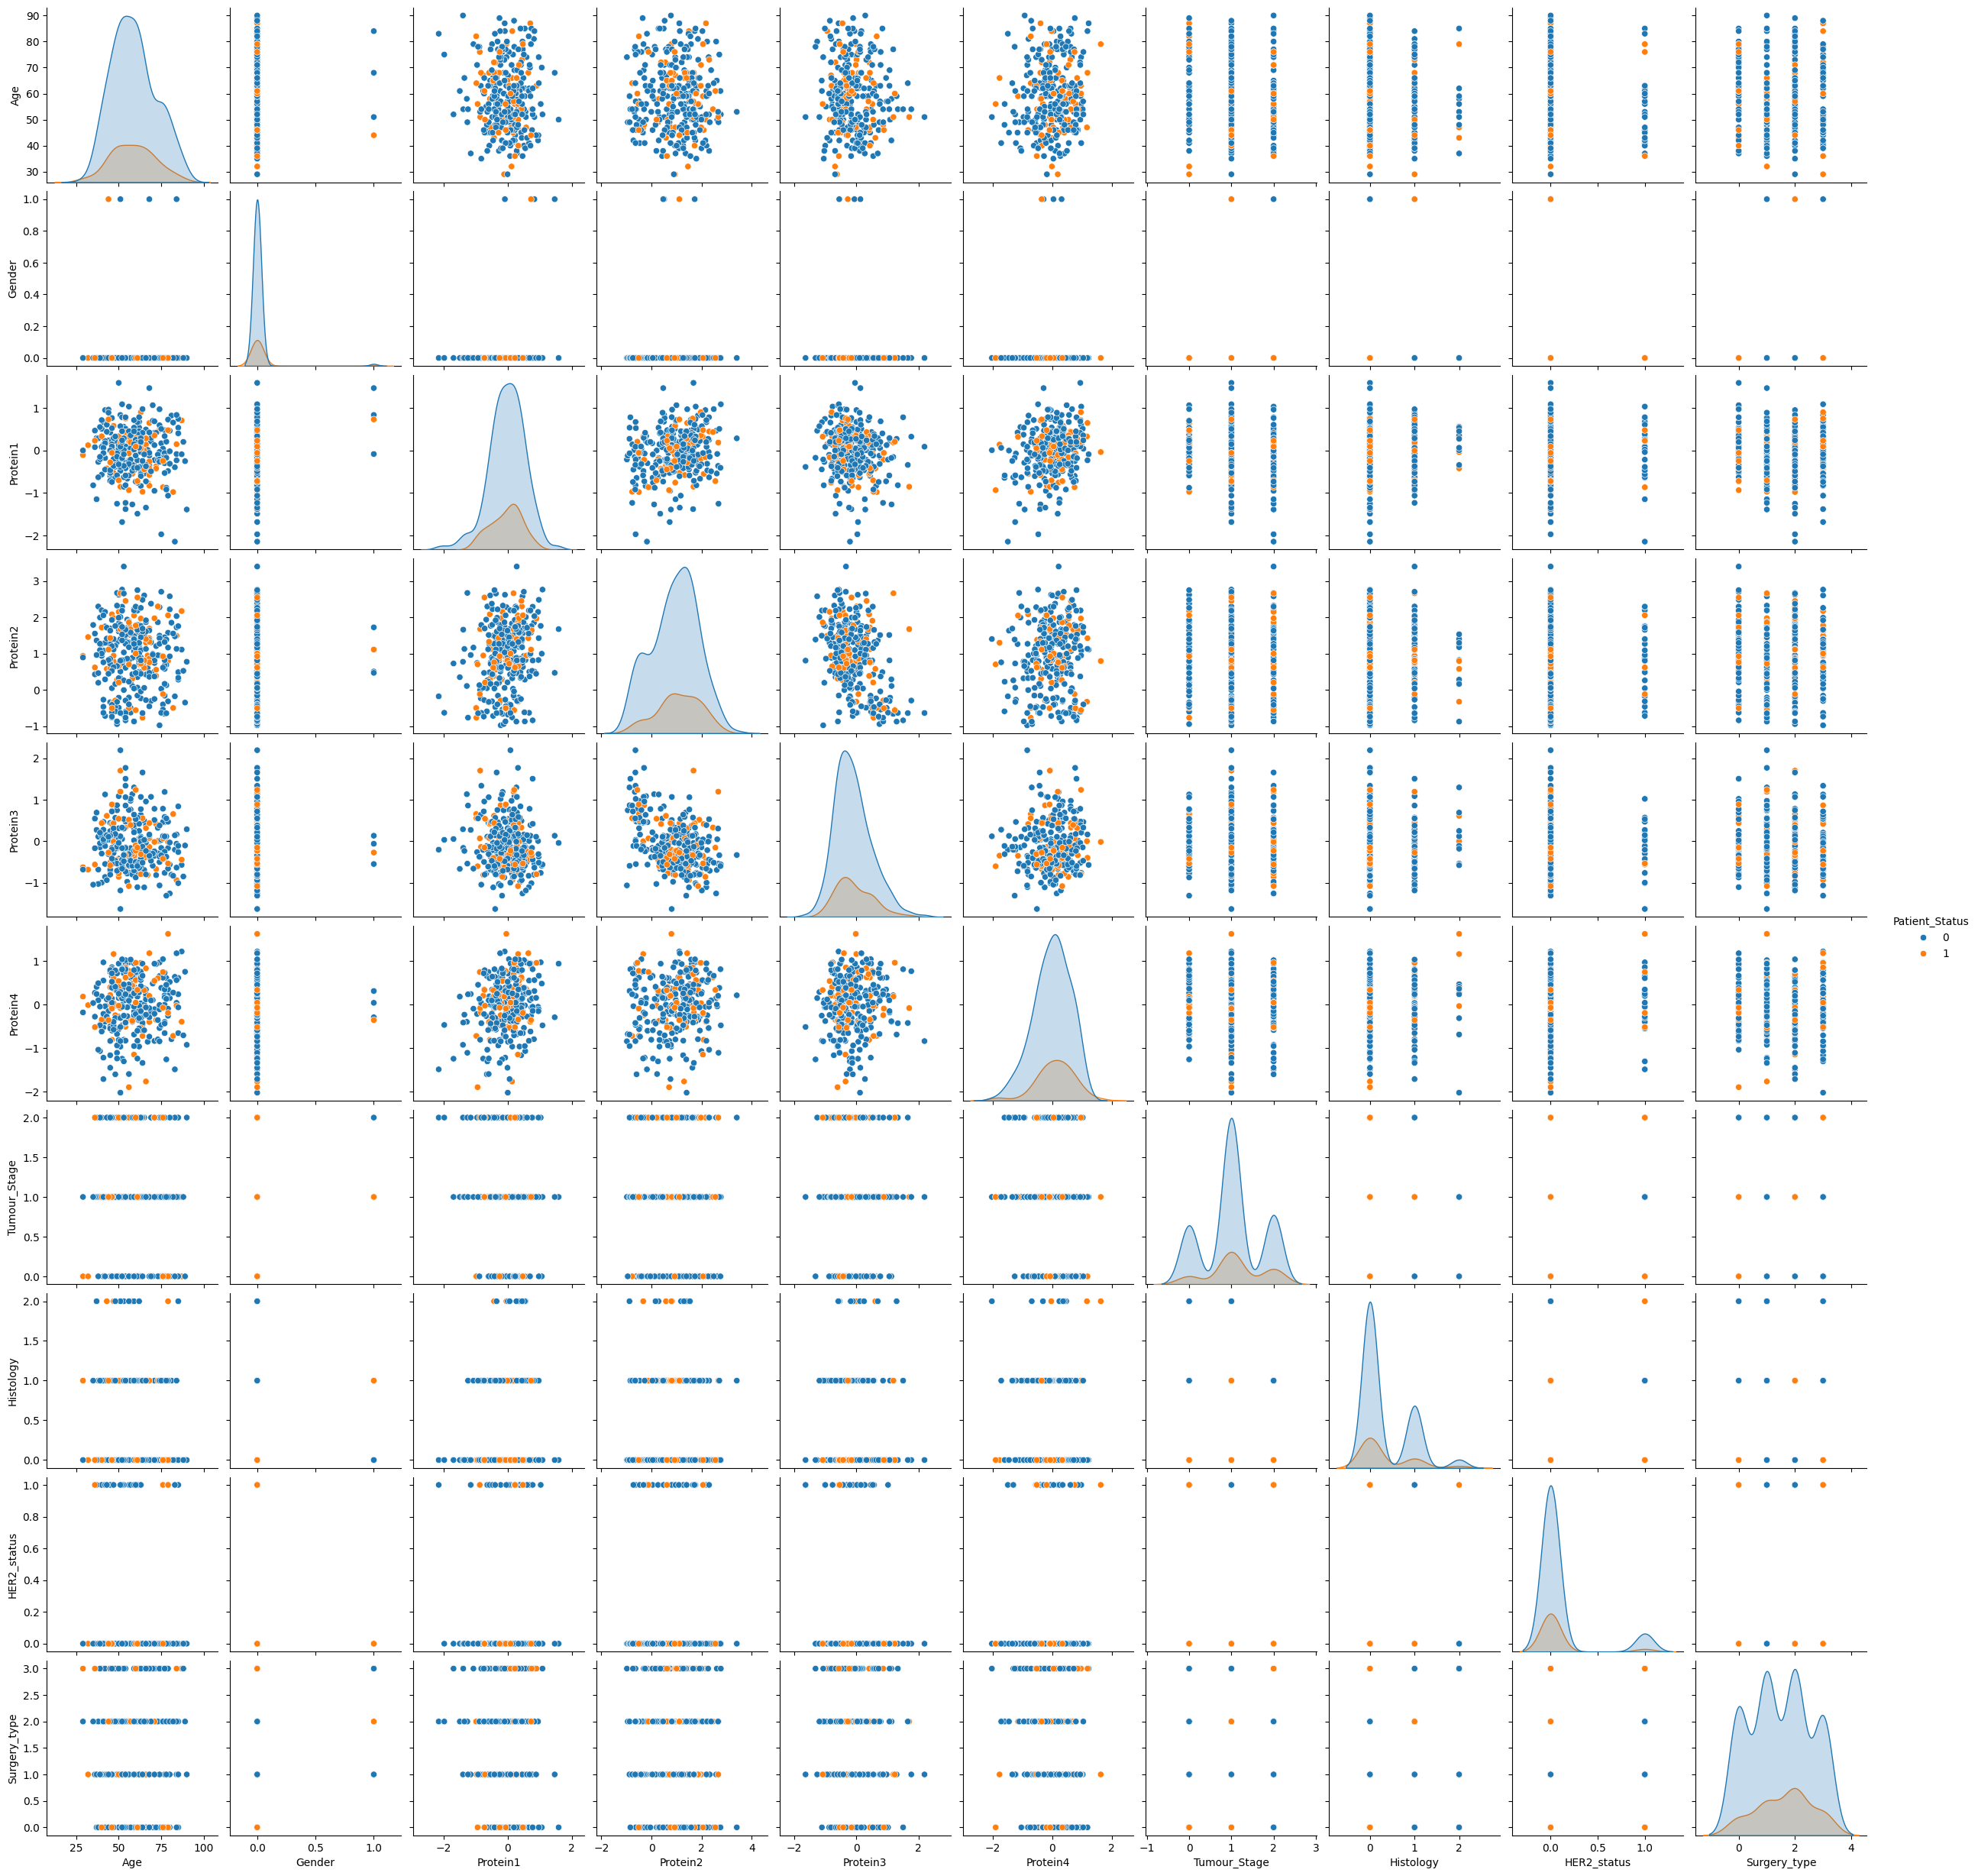

In [72]:
# pair plot of features
sns.pairplot(df, hue="Patient_Status",
            vars =['Age', 'Gender',
                   'Protein1', 'Protein2', 'Protein3', 'Protein4',
                   'Tumour_Stage',
                   'Histology', 'HER2_status' , 'Surgery_type'])

In [73]:
df.head(15)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
0,36.0,0,0.080353,0.426380,0.547150,0.273680,2,0,0,1,0
1,43.0,0,-0.420320,0.578070,0.614470,-0.031505,1,2,0,0,1
2,69.0,0,0.213980,1.311400,-0.327470,-0.234260,2,0,0,2,0
3,56.0,0,0.345090,-0.211470,-0.193040,0.124270,1,0,0,1,0
4,56.0,0,0.221550,1.906800,0.520450,-0.311990,1,0,0,2,1
5,84.0,1,-0.081872,1.724100,-0.057335,0.043025,2,0,0,1,0
6,53.0,0,-0.069535,1.418300,-0.361050,0.391580,1,0,0,3,0
8,77.0,0,-0.151750,-0.663320,1.189400,0.217180,1,0,0,1,0
9,40.0,0,-0.565700,1.266800,-0.293460,0.193950,1,1,1,2,0
10,71.0,0,-0.223050,0.505940,-0.349430,-0.835300,1,0,0,0,0


In [74]:
def right_nor_left(df, int64_lst):

    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []

    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0

    for value in float64_lst:

        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1

    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness)
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total)

    return skewness_df, skewness_total_df

In [75]:
float64_cols = ['float64','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [76]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Age,0.2857,positive (+ve) skewed
1,Protein1,-0.4655,negative (-ve) skewed
2,Protein2,-0.1938,negative (-ve) skewed
3,Protein3,0.7284,positive (+ve) skewed
4,Protein4,-0.4792,negative (-ve) skewed


In [77]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,2,0,3


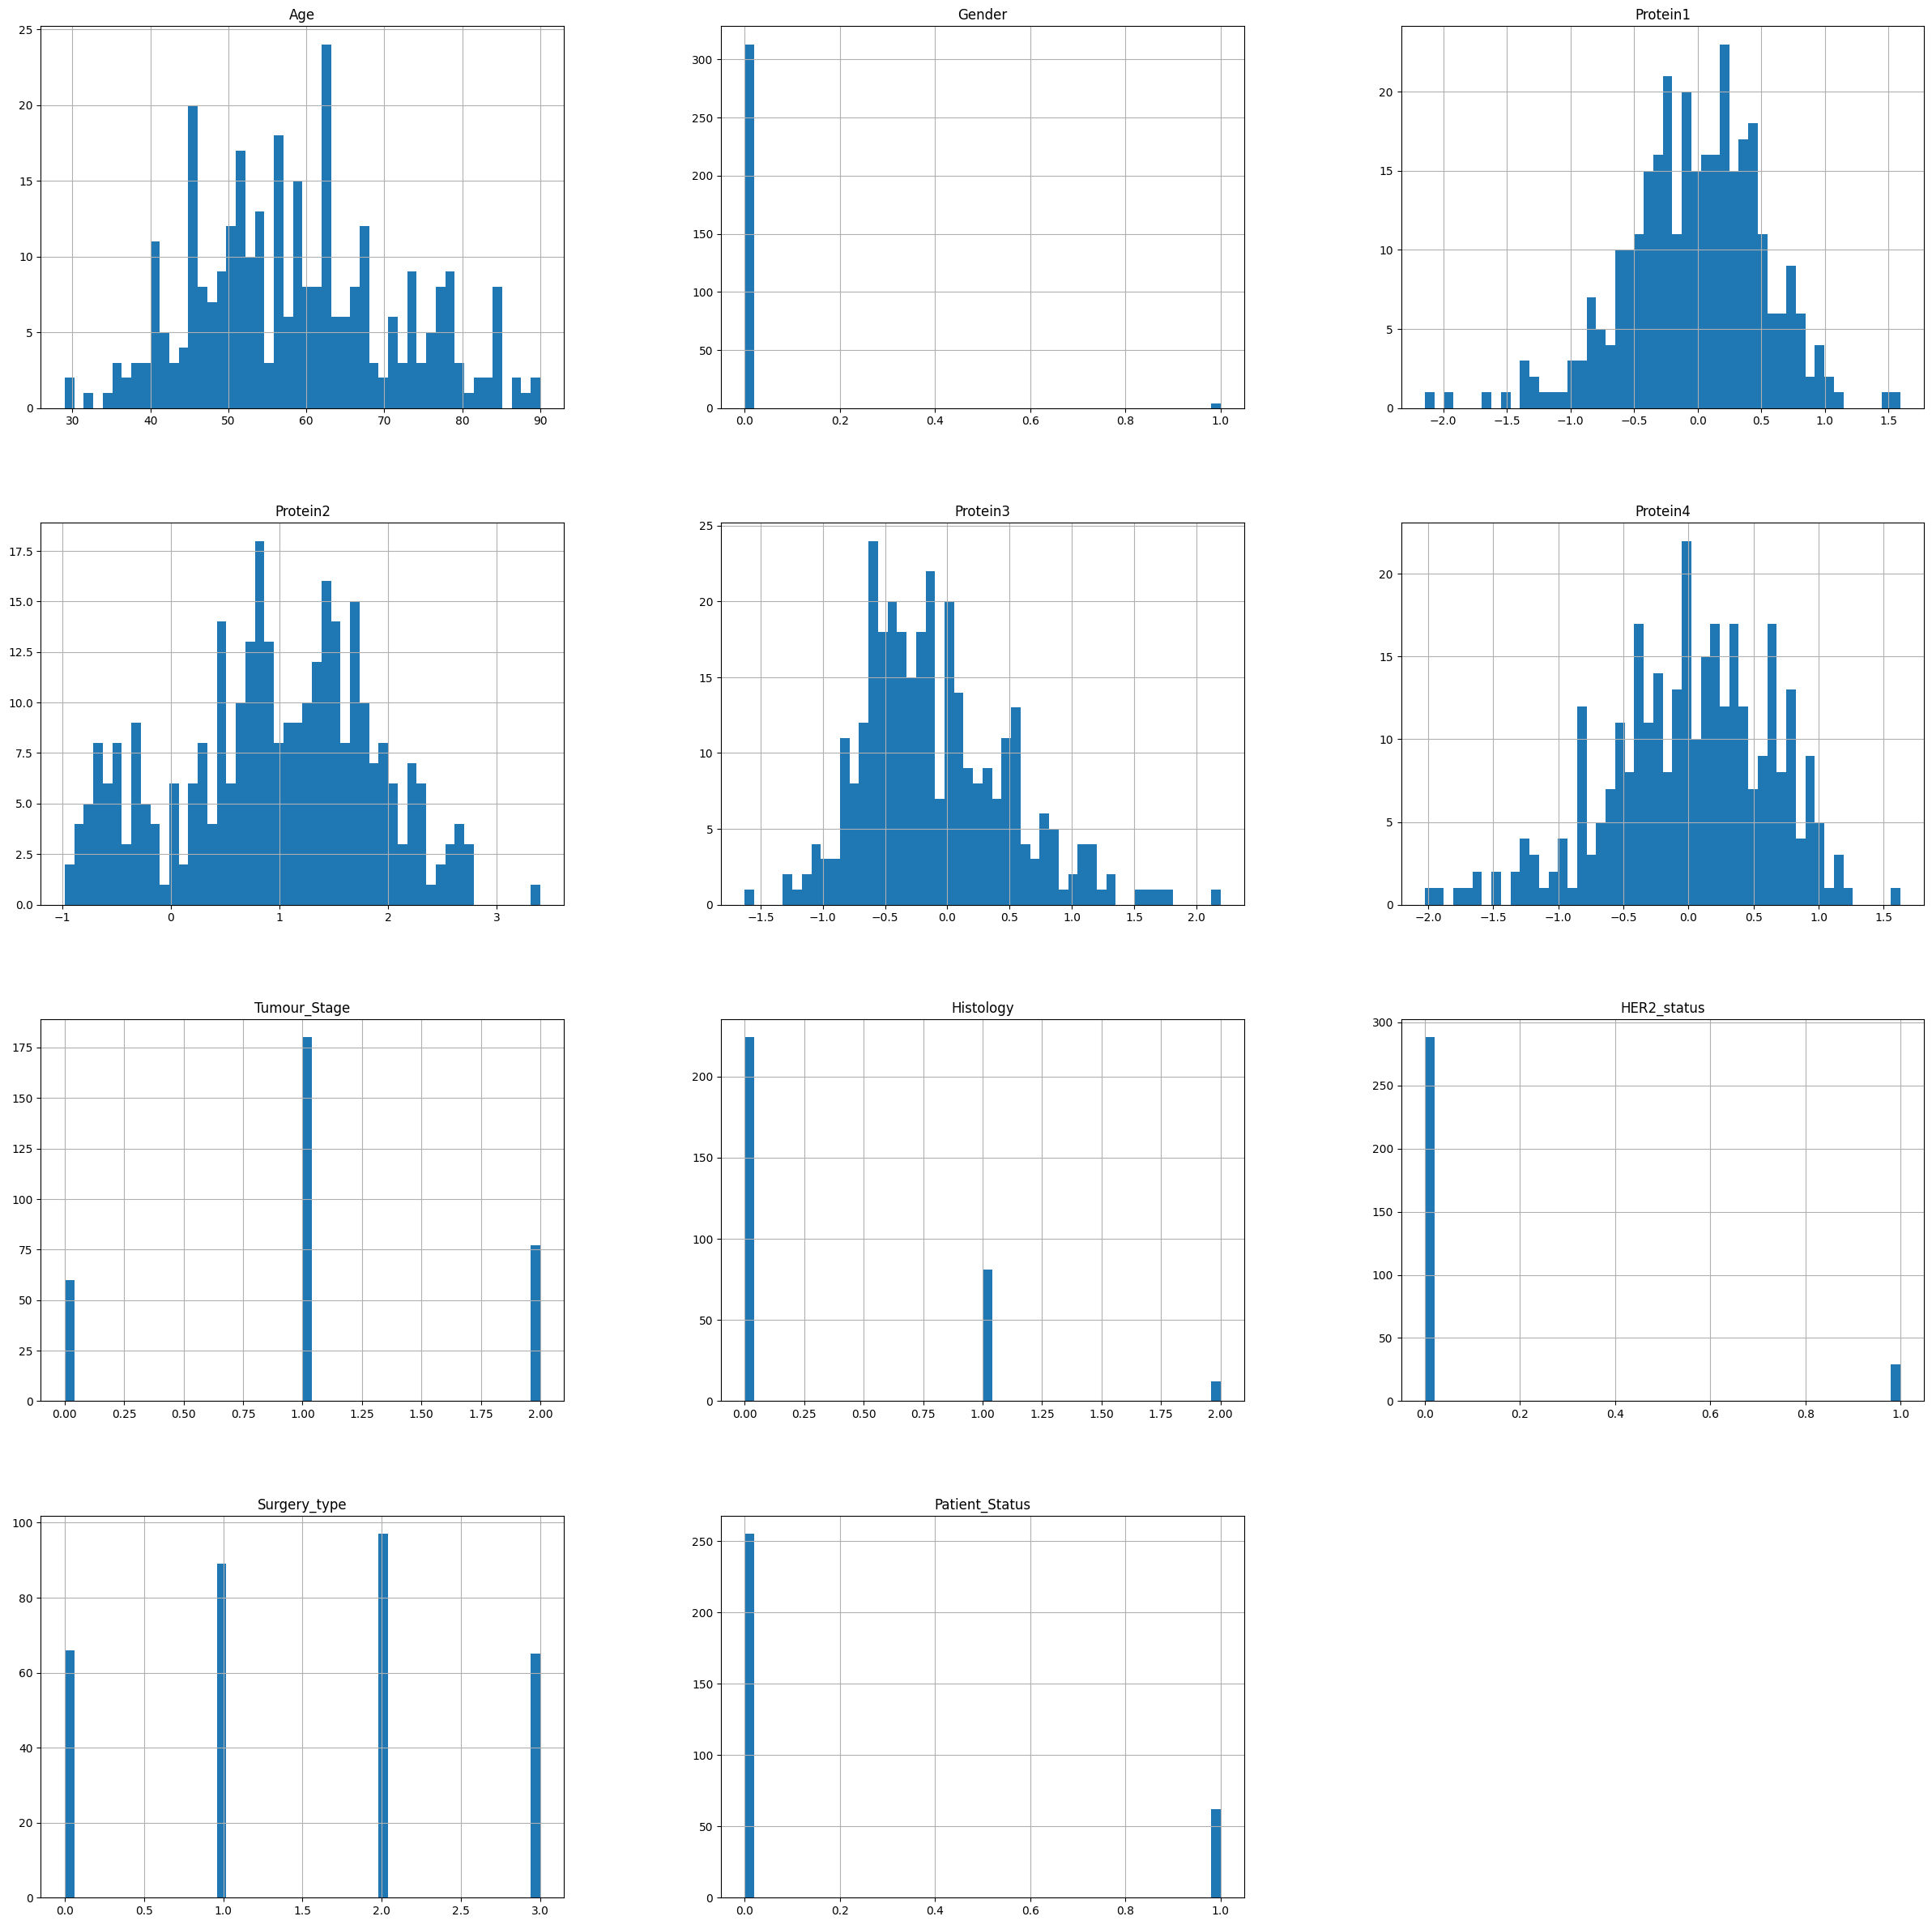

In [78]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()

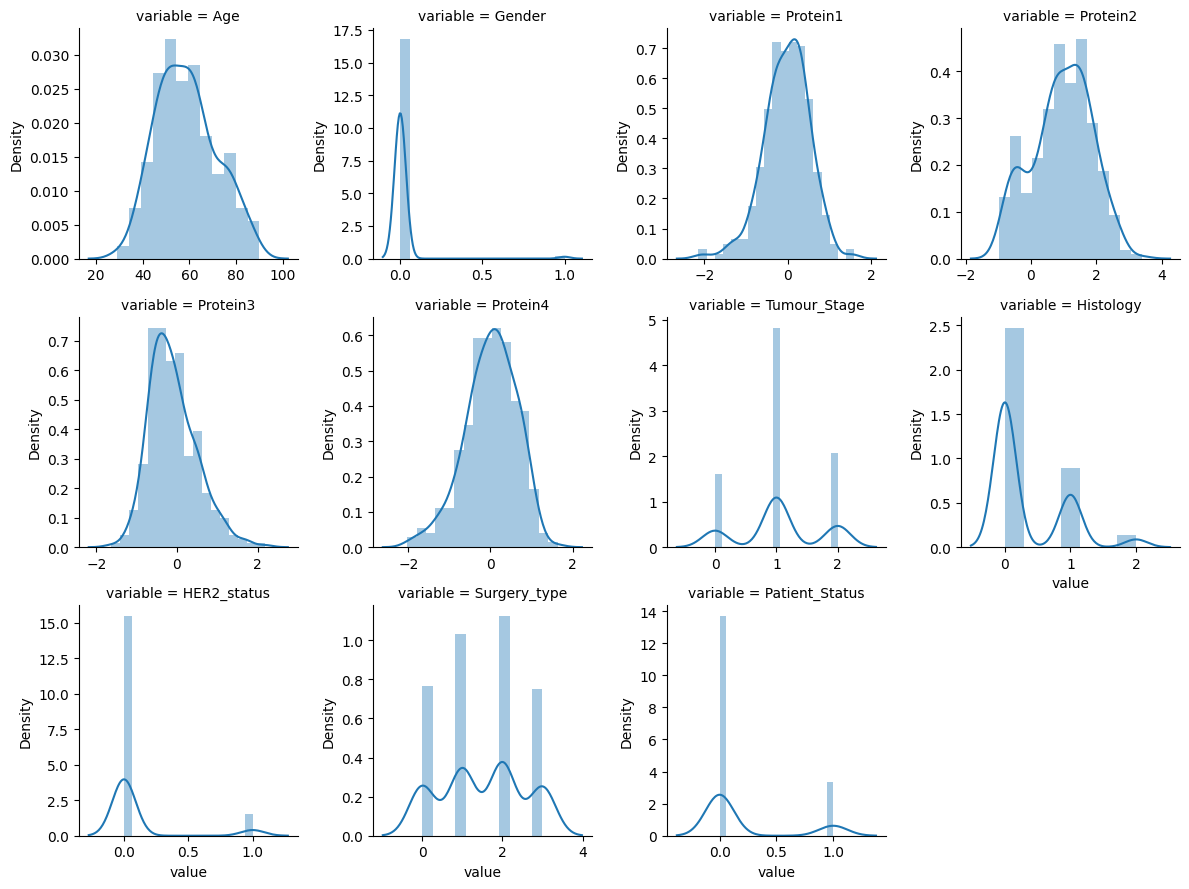

In [79]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [80]:
#+ve skewed
df['Patient_Status'].skew()

1.5422472079161798

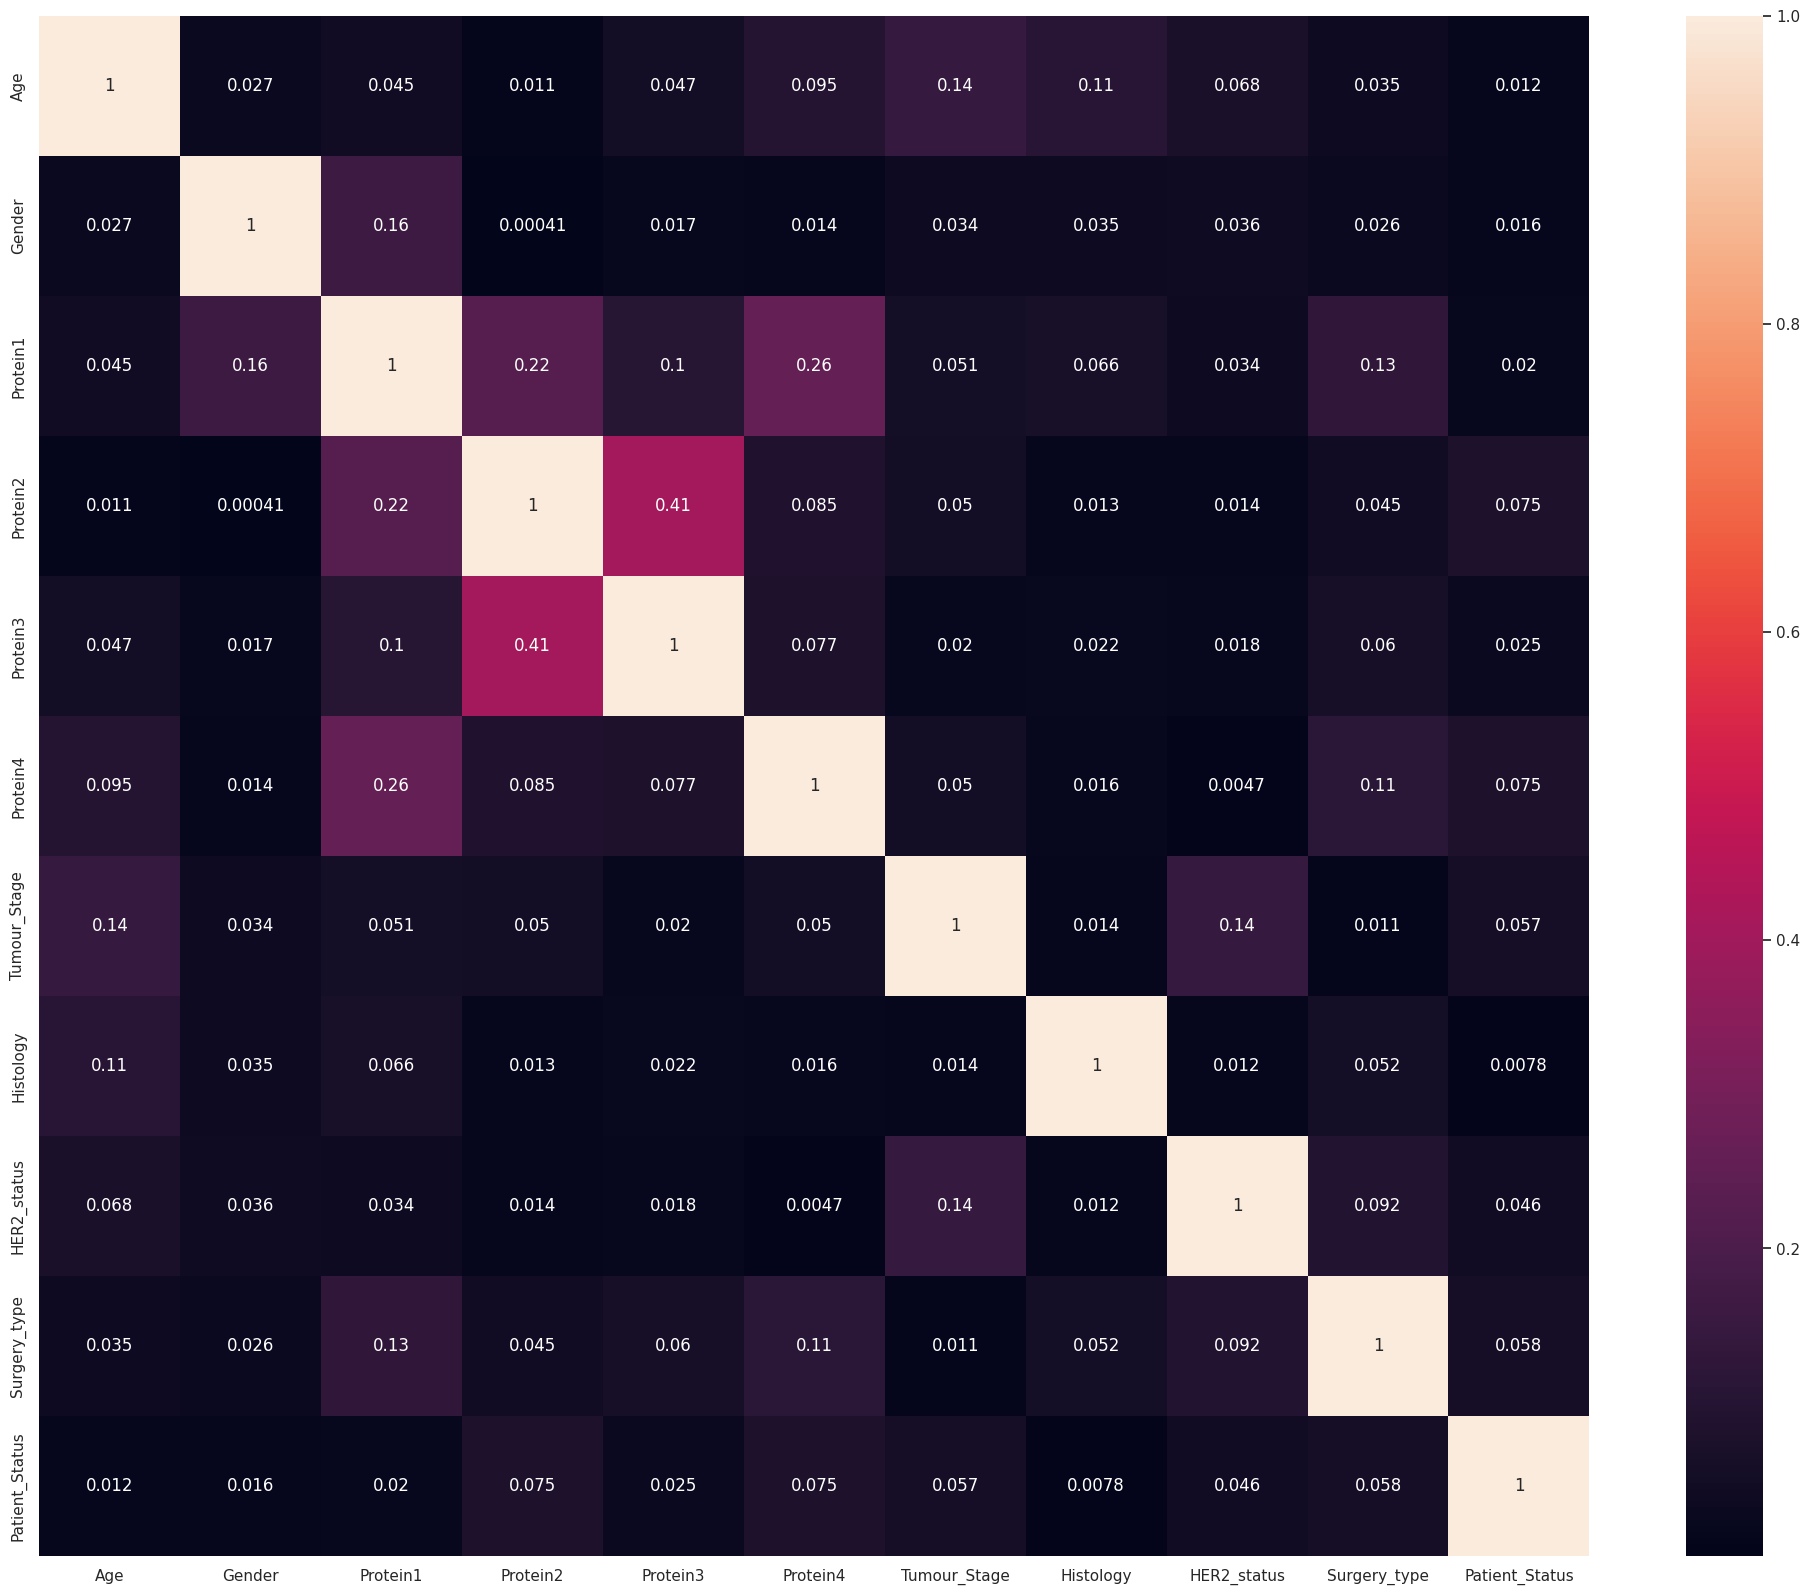

In [81]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

In [82]:
print (corr['Patient_Status'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Patient_Status'].sort_values(ascending=False)[-5:]) #last 5 values`

Patient_Status    1.000000
Protein4          0.074876
Protein2          0.074810
Surgery_type      0.057576
Tumour_Stage      0.056747
HER2_status       0.046123
Protein3          0.025305
Protein1          0.019805
Gender            0.015509
Age               0.012410
Histology         0.007823
Name: Patient_Status, dtype: float64 

----------------------
Protein3     0.025305
Protein1     0.019805
Gender       0.015509
Age          0.012410
Histology    0.007823
Name: Patient_Status, dtype: float64


In [83]:
corr

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
Age,1.000000,0.026696,0.044541,0.011387,0.047362,0.095417,0.144483,0.107611,0.068386,0.034617,0.012410
Gender,0.026696,1.000000,0.159685,0.000406,0.017109,0.014185,0.033881,0.034995,0.035872,0.026380,0.015509
Protein1,0.044541,0.159685,1.000000,0.223093,0.103046,0.259171,0.051447,0.066462,0.033544,0.127882,0.019805
Protein2,0.011387,0.000406,0.223093,1.000000,0.407670,0.084939,0.049881,0.013074,0.013568,0.045292,0.074810
Protein3,0.047362,0.017109,0.103046,0.407670,1.000000,0.076759,0.019770,0.022359,0.017628,0.059958,0.025305
Protein4,0.095417,0.014185,0.259171,0.084939,0.076759,1.000000,0.050364,0.016289,0.004728,0.113382,0.074876
Tumour_Stage,0.144483,0.033881,0.051447,0.049881,0.019770,0.050364,1.000000,0.014403,0.141031,0.010979,0.056747
Histology,0.107611,0.034995,0.066462,0.013074,0.022359,0.016289,0.014403,1.000000,0.012156,0.052023,0.007823
HER2_status,0.068386,0.035872,0.033544,0.013568,0.017628,0.004728,0.141031,0.012156,1.000000,0.092058,0.046123
Surgery_type,0.034617,0.026380,0.127882,0.045292,0.059958,0.113382,0.010979,0.052023,0.092058,1.000000,0.057576


In [84]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [85]:
to_drop

[]

In [86]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2_status,Surgery_type,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,1,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,2,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,1,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,2,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    int64  
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    int64  
 7   Histology       317 non-null    int64  
 8   HER2_status     317 non-null    int64  
 9   Surgery_type    317 non-null    int64  
 10  Patient_Status  317 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 37.8 KB


In [88]:
features = ['Age','Gender',
            'Protein1', 'Protein2',
            'Protein3',
            'Protein4',
            'Tumour_Stage',
            'Histology', 'HER2_status','Surgery_type' ]

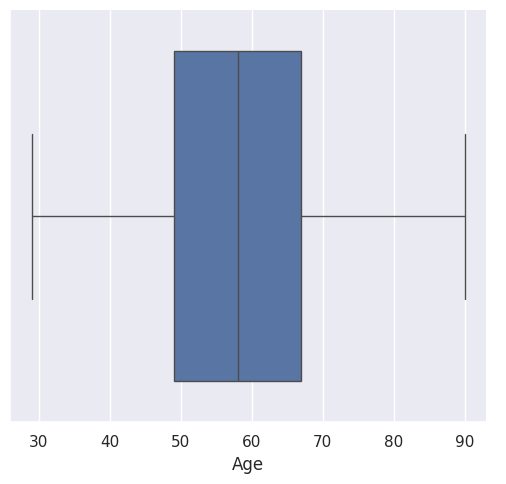

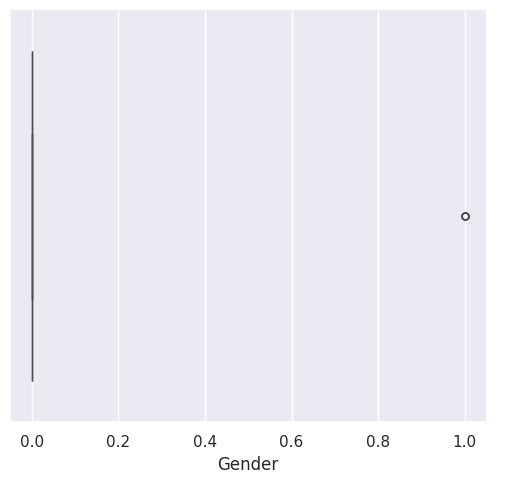

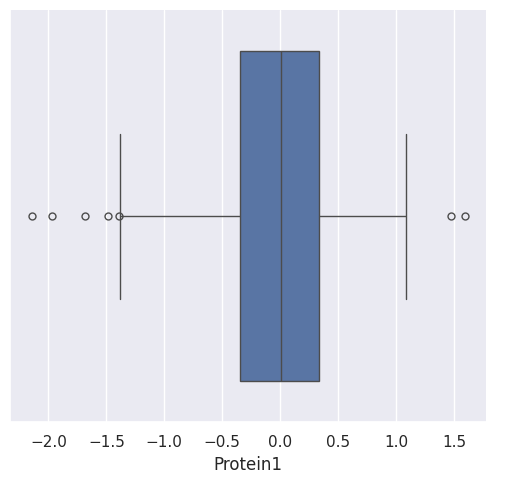

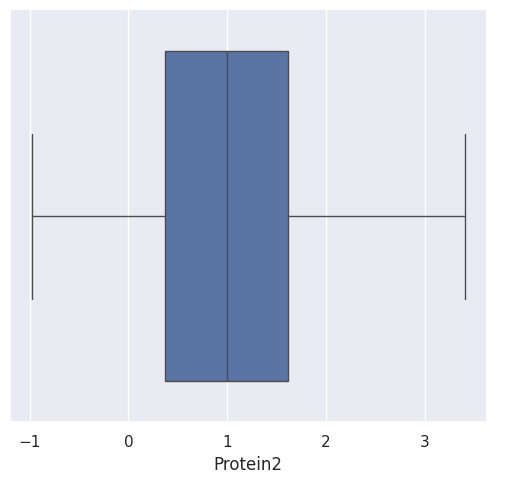

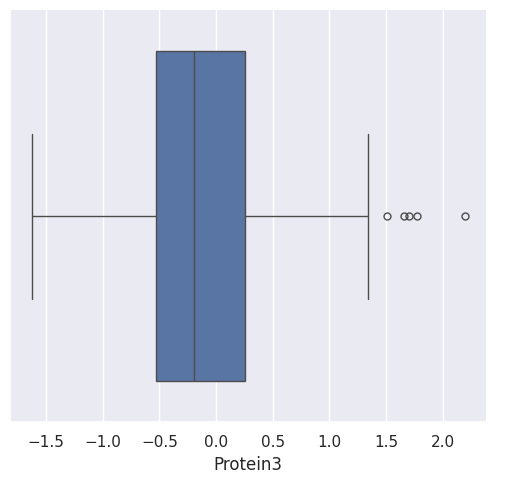

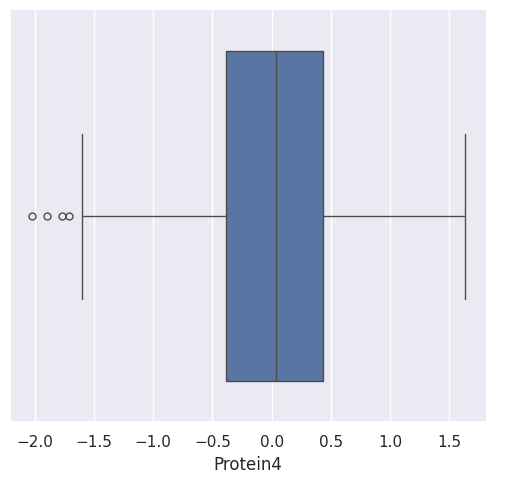

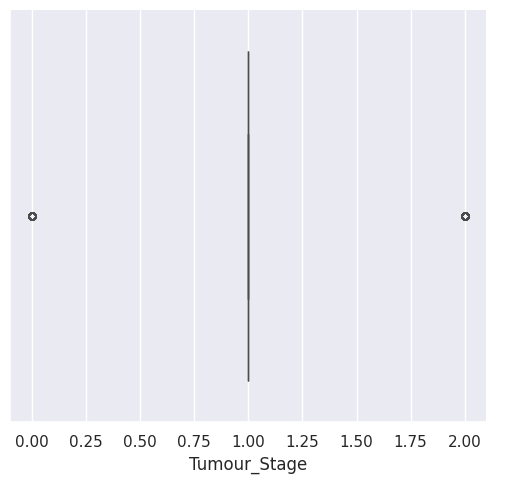

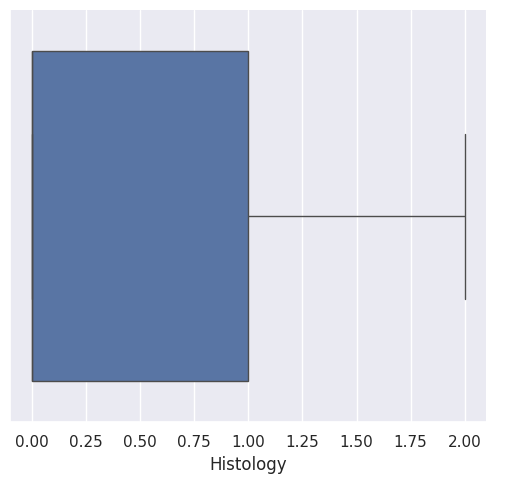

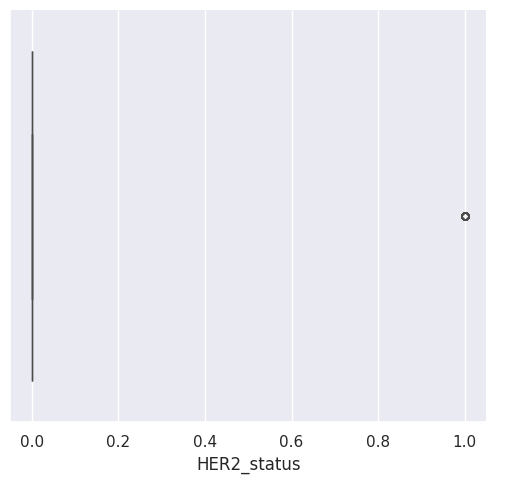

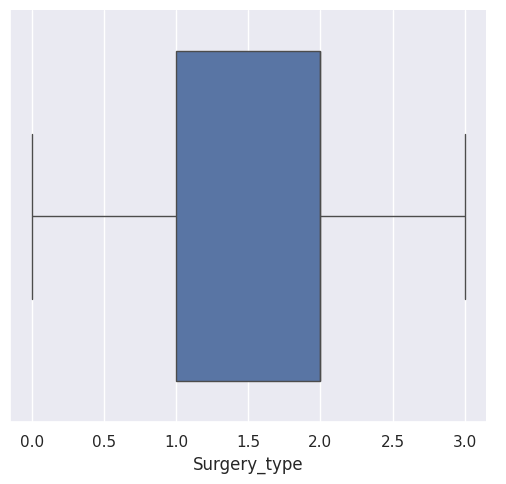

In [89]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

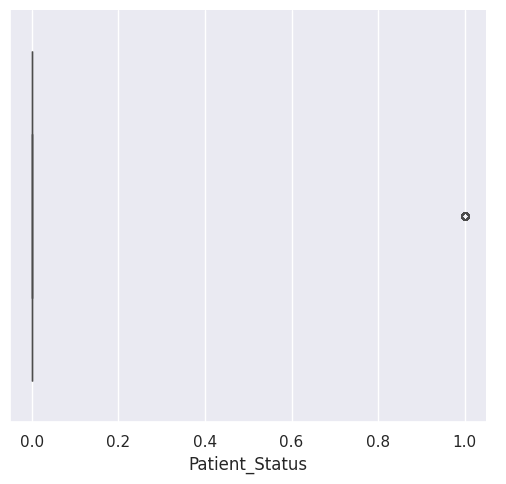

In [90]:
#for target variable
sns.catplot(data=df, x='Patient_Status', kind='box')

In [91]:
# Separate target and feature column in X and y variable

target = 'Patient_Status'

# X will be the features
X = df.drop(target,axis=1)
#y will be the target variable
y = df[target]

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           317 non-null    float64
 1   Gender        317 non-null    int64  
 2   Protein1      317 non-null    float64
 3   Protein2      317 non-null    float64
 4   Protein3      317 non-null    float64
 5   Protein4      317 non-null    float64
 6   Tumour_Stage  317 non-null    int64  
 7   Histology     317 non-null    int64  
 8   HER2_status   317 non-null    int64  
 9   Surgery_type  317 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 35.3 KB


In [93]:
y

,Patient_Status
0,0
1,1
2,0
3,0
4,1
...,...
329,1
330,1
331,1
332,1


In [94]:
# Check the shape of X and y variable
X.shape, y.shape

((317, 10), (317,))

In [95]:
# Reshape the y variable
y = y.values.reshape(-1,1)

In [96]:
# Again check the shape of X and y variable
X.shape, y.shape

((317, 10), (317, 1))

In [97]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((253, 10), (64, 10), (253, 1), (64, 1))

In [99]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [100]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [101]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.7984189723320159

In [102]:
#Accuracy of test data
log_R.score(X_test, y_test)

0.828125

In [103]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.51887452, 0.43852901, 0.43852901, 0.34641016, 0.48989795,
       0.28284271, 0.56568542, 0.4       , 0.4472136 , 0.48989795])

In [104]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.44178803325206617

In [105]:
# Predict the values on X_test_scaled dataset
y_predicted = log_R.predict(X_test)

In [106]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [107]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

<Axes: >

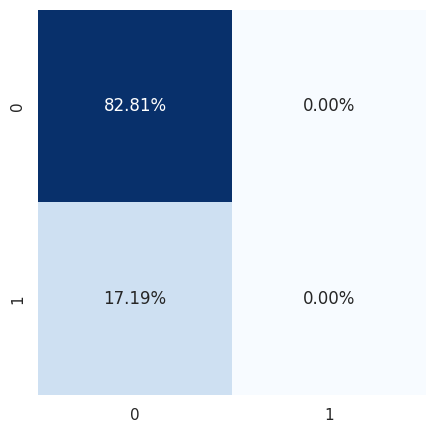

In [109]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues', cbar = False)

In [110]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix


print("The model used is Logistic Regression")

l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))

prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))

rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))

f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))

c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 0.828125
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        53
           1       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



In [111]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.8063241106719368

In [113]:
#Accuracy of test data
classifier.score(X_test, y_test)

0.796875

In [114]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.51887452, 0.51887452, 0.51887452, 0.34641016, 0.52915026,
       0.4       , 0.63245553, 0.4472136 , 0.4472136 , 0.48989795])

In [115]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.4848964660305234

In [116]:
# Predict the values on X_test_scaled dataset
y_predicted = classifier.predict(X_test)

In [117]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [118]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(28.75, 0.5, 'True Class')

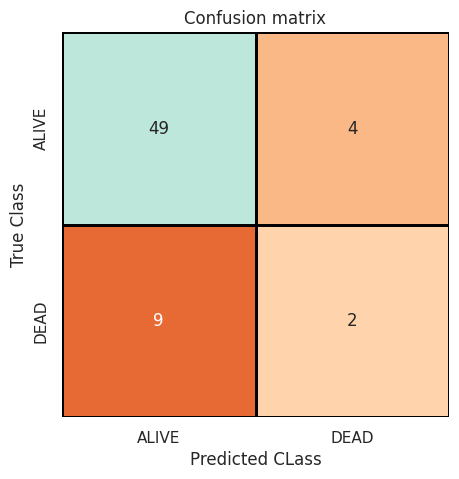

In [119]:
#We are drawing cm on heatmap to have better understanding
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.yticks(np.arange(2)+.5,['ALIVE', 'DEAD'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

In [122]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [123]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [124]:
#Accuracy of test data
clas.score(X_test, y_test)

0.828125

In [126]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.44571326461769445

In [132]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbors',
                  'Random Forest']
cal_metric

,Score in percentage
Logistic Regression,0.828125
K-nearest Neighbors,0.796875
Random Forest,0.828125


In [133]:
import pickle
pickle.dump(log_R , open('breast_cancer_Logistic_Regression.pkl', 'wb'))
pickle.dump(classifier , open('breast_cancer_K-nearest_Neighbors.pkl', 'wb'))
pickle.dump(clas , open('breast_cancer_Random_Forest.pkl', 'wb'))

In [134]:
import pickle

def model_prediction(features):


    pickled_model = pickle.load(open('breast_cancer_Logistic_Regression.pkl', 'rb'))
    Patient = str(list(pickled_model.predict(features)))


    return str(f'The Patient is {Patient}')


In [135]:
df.iloc[0]

,0
Age,36.000000
Gender,0.000000
Protein1,0.080353
Protein2,0.426380
Protein3,0.547150
Protein4,0.273680
Tumour_Stage,2.000000
Histology,0.000000
HER2_status,0.000000
Surgery_type,1.000000


In [136]:
# Prediction
#features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']]
features = [[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 2, 2,]]
print(model_prediction(features))

The Patient is [0]


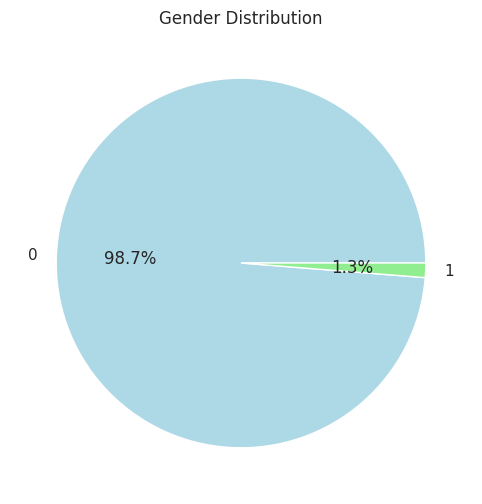

In [139]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()


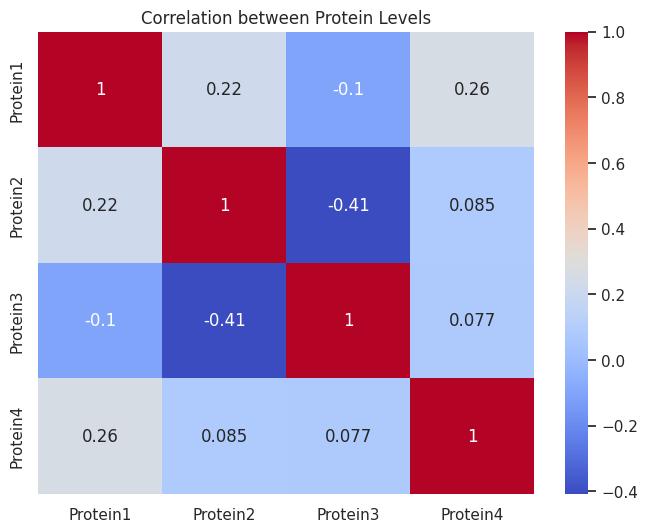

In [140]:
protein_data = df[['Protein1', 'Protein2', 'Protein3', 'Protein4']]
plt.figure(figsize=(8,6))
sns.heatmap(protein_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Protein Levels')
plt.show()


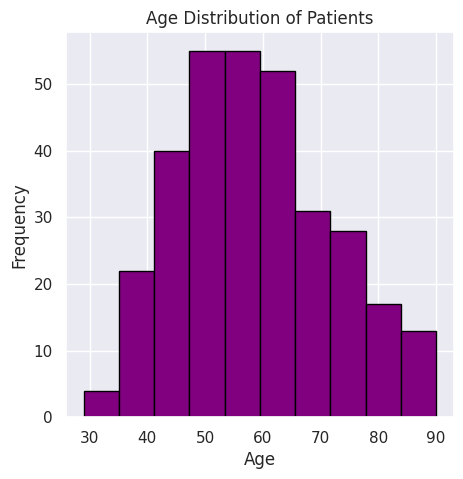

In [142]:
# Histogram: Distribution of Age
plt.hist(df['Age'], bins=10, color='purple', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


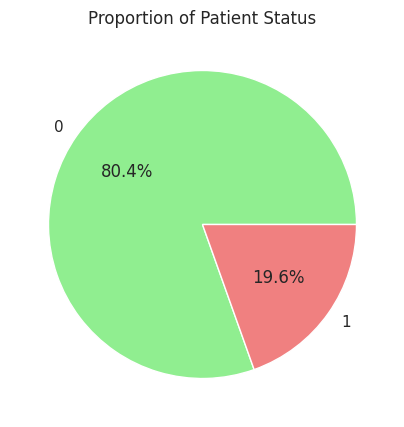

In [143]:
# Pie chart: Proportion of Patient Status (Alive/Dead)
df['Patient_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Patient Status')
plt.ylabel('')  # Hide the y-label
plt.show()


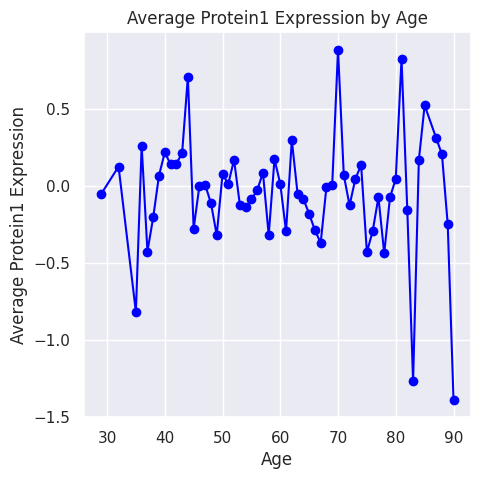

In [144]:
# Line graph: Average Protein1 expression by Age
df.groupby('Age')['Protein1'].mean().plot(kind='line', color='blue', marker='o')
plt.title('Average Protein1 Expression by Age')
plt.xlabel('Age')
plt.ylabel('Average Protein1 Expression')
plt.show()
